In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Matplotlib is building the font cache; this may take a moment.


In [3]:
df=pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')

In [4]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [7]:
df.shape

(541, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [10]:
# convrt price column values to object to integer

In [13]:
df['Prize']=df['Prize'].str.replace(',','').astype('Int64')

In [14]:
df.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              Int64
dtype: object

In [15]:
# Data Preprocessing

In [16]:
# Missing Values

In [17]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [18]:
# Convert categorical values into numeric values

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Model_encode']=label_encoder.fit_transform(df['Model'])
df['Colour_encode']=label_encoder.fit_transform(df['Colour'])
df['Processor_encoe']=label_encoder.fit_transform(df['Processor_'])

In [21]:
# convert Front camera and Rear camera column values to integer datatype

In [24]:
df['FrontCamera']=df['Front Camera'].apply(lambda x:int(x[:-2]))
df['RearCamera']=df['Rear Camera'].apply(lambda x:int(x[:-2]))

In [25]:
# Removing unnecessary columns

In [27]:
df.drop(columns=['Unnamed: 0','Model','Colour','Processor_','Rear Camera','Front Camera'],inplace=True)

In [28]:
df.head

<bound method NDFrame.head of      Memory  RAM  Battery_  AI Lens  Mobile Height  Prize  Model_encode  \
0        64    4      6000        1          16.76   7299            23   
1        64    4      6000        1          16.76   7299            23   
2       128    8      5000        0          16.64  11999            37   
3        32    2      5000        0          16.56   5649            69   
4       128    8      5000        1          16.76   8999            12   
..      ...  ...       ...      ...            ...    ...           ...   
536     256    8      3900        0          15.49  79999           118   
537      32    2      3100        0          12.70   5998            32   
538      64    4      5000        0          16.76   9990           123   
539     128    8      5000        0          16.26  38999           110   
540     128    4      5000        0          16.66  15999            59   

     Colour_encode  Processor_encoe  FrontCamera  RearCamera  
0     

In [29]:
# Feature Extraction 

In [30]:
df.corr(numeric_only=True)['Prize'].sort_values(ascending=False)

Prize              1.000000
Memory             0.566660
FrontCamera        0.532321
RAM                0.532024
RearCamera         0.410367
Mobile Height      0.176009
Colour_encode      0.038895
Battery_          -0.034297
Processor_encoe   -0.050244
Model_encode      -0.075163
AI Lens           -0.153691
Name: Prize, dtype: float64

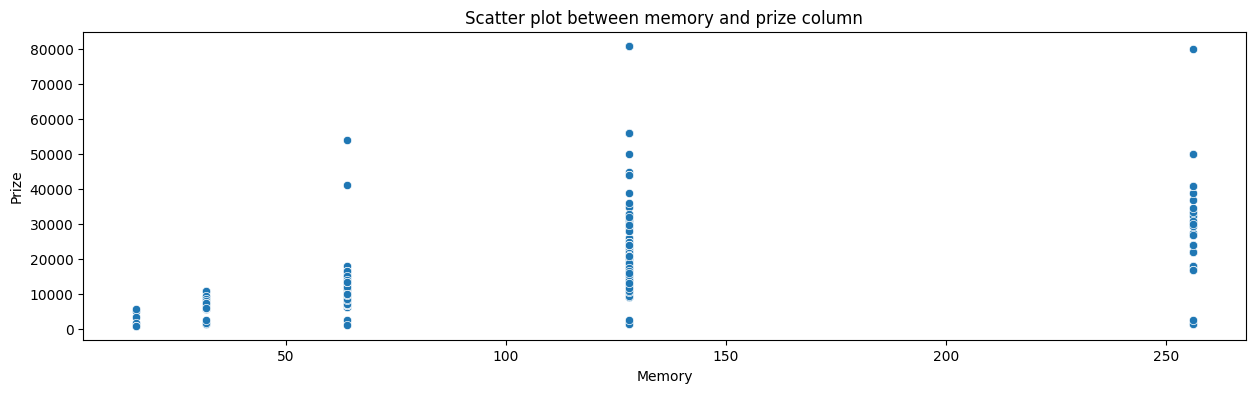

In [31]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=df,x='Memory',y="Prize")
plt.title('Scatter plot between memory and prize column')
plt.show()

Text(0.5, 1.0, 'Scatterplot between FrontMp and Prize')

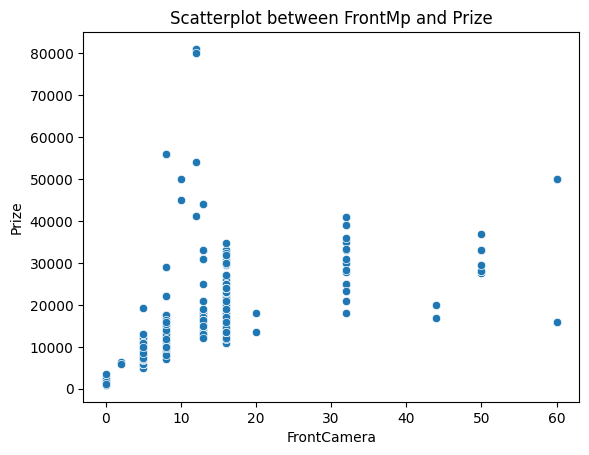

In [32]:
sns.scatterplot(data=df,x='FrontCamera',y='Prize')
plt.title('Scatterplot between FrontMp and Prize')

In [33]:
# outliers for price column 

In [35]:
q1=df['Prize'].quantile(0.25)
q2=df['Prize'].quantile(0.75)
iqr=q2-q1
outliers=df[(df['Prize']<(q1-1.5*iqr)) | (df['Prize'] > (q2+1.5*iqr))]
outliers

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Model_encode,Colour_encode,Processor_encoe,FrontCamera,RearCamera
222,128,8,4500,0,16.76,49999,117,181,88,10,50
286,128,8,3300,0,17.02,44999,119,181,97,10,12
305,128,8,4400,0,16.64,34999,34,47,96,32,50
308,128,8,4300,0,15.49,43999,5,209,108,13,64
309,128,8,4300,0,15.49,43999,5,37,108,13,64
327,128,8,4300,0,15.49,43999,5,217,108,13,64
396,256,4,4600,0,17.22,36999,176,129,48,50,50
400,256,4,4610,0,16.94,49999,35,107,90,60,200
416,128,8,4270,0,16.00,55999,4,217,16,8,50
417,128,8,4270,0,16.00,55999,4,165,16,8,50


In [36]:
# Remove the outlies

In [37]:
df.drop(outliers.index)

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Model_encode,Colour_encode,Processor_encoe,FrontCamera,RearCamera
0,64,4,6000,1,16.76,7299,23,159,113,5,13
1,64,4,6000,1,16.76,7299,23,20,113,5,13
2,128,8,5000,0,16.64,11999,37,149,75,16,50
3,32,2,5000,0,16.56,5649,69,201,56,5,8
4,128,8,5000,1,16.76,8999,12,130,14,5,50
...,...,...,...,...,...,...,...,...,...,...,...
534,64,4,5000,0,16.55,9790,55,96,68,8,50
535,64,3,5000,0,16.51,9999,104,119,65,5,13
537,32,2,3100,0,12.70,5998,32,52,68,2,5
538,64,4,5000,0,16.76,9990,123,259,35,8,50


In [38]:
df.dtypes

Memory               int64
RAM                  int64
Battery_             int64
AI Lens              int64
Mobile Height      float64
Prize                Int64
Model_encode         int64
Colour_encode        int64
Processor_encoe      int64
FrontCamera          int64
RearCamera           int64
dtype: object

In [39]:
# outliers plotting 

<Figure size 1400x400 with 0 Axes>

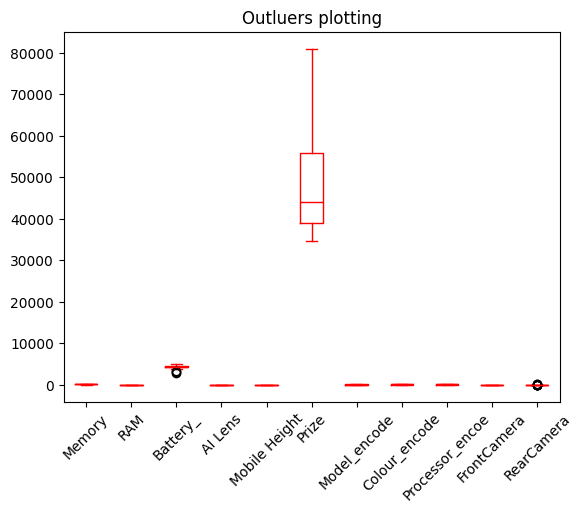

In [40]:
plt.figure(figsize=(14,4))
outliers.plot(kind='box',color='red')
plt.title('Outluers plotting')
plt.xticks(rotation=45)
plt.show()

In [41]:
# correlation Analysis

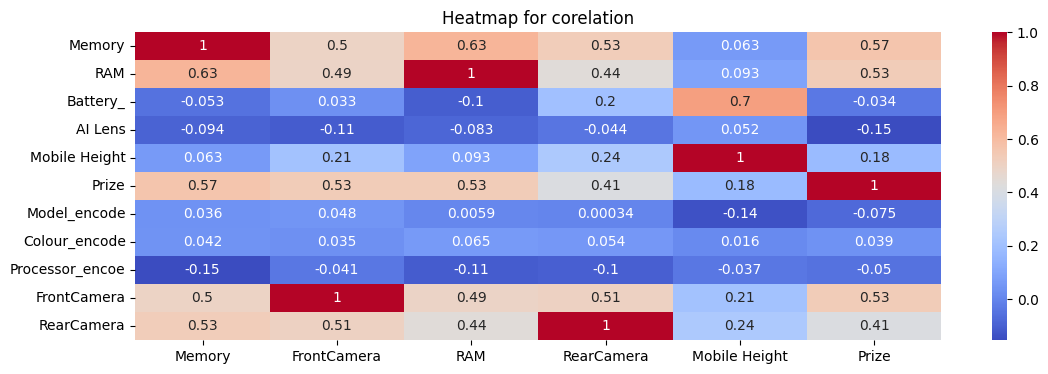

In [43]:
plt.figure(figsize=(13,4))
sns.heatmap(df.corr(numeric_only=True)[['Memory','FrontCamera','RAM','RearCamera','Mobile Height','Prize']],annot=True,cmap='coolwarm')
plt.title('Heatmap for corelation')
plt.show()

In [44]:
# Count for RAM column

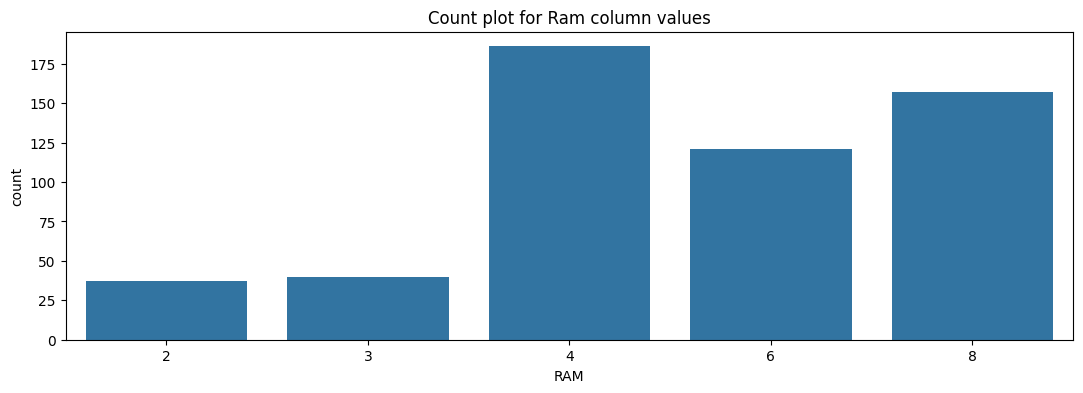

In [45]:
plt.figure(figsize=(13,4))
sns.countplot(data=df,x='RAM')
plt.title('Count plot for Ram column values')
plt.show()

In [46]:
# Conclusion 

In [47]:
# 4 RAM has highdemand value as compared to other Ram Size

In [48]:
# Box plot for Memory and Prize column

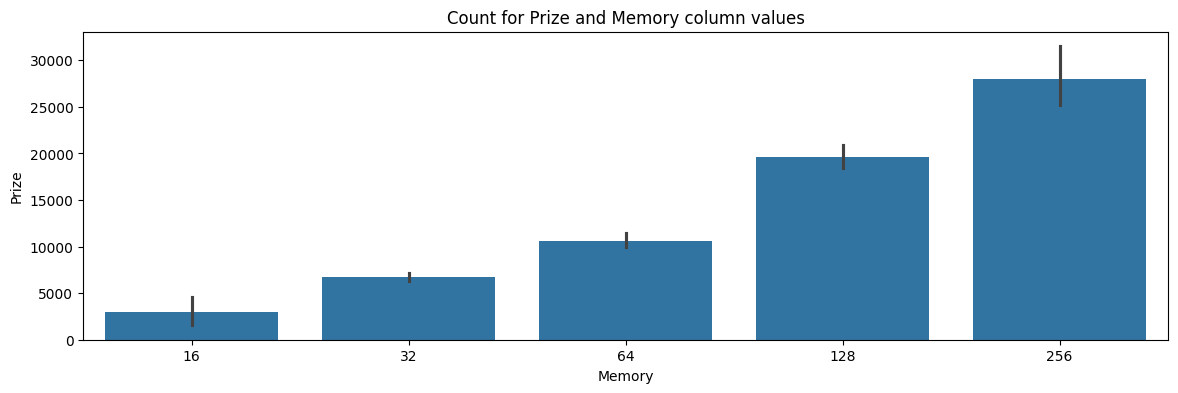

In [49]:
plt.figure(figsize=(14,4))
sns.barplot(x='Memory',y='Prize',data=df)
plt.title('Count for Prize and Memory column values')
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.show()

In [50]:
# Conclusion 
# With increasing the mobile price the memory also increasing.128 gb memory has heigh demand as compared to another memory

In [51]:
# PCA(Princliple Component Ananlysis)

In [52]:
x=df.drop('Prize',axis=1)
y=df.Prize

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(df)

array([[-0.76886767, -0.70466488,  1.44774491, ...,  1.58733302,
        -0.77305879, -1.06017623],
       [-0.76886767, -0.70466488,  1.44774491, ...,  1.58733302,
        -0.77305879, -1.06017623],
       [ 0.28820325,  1.31239173,  0.16475195, ...,  0.41544506,
         0.44303237,  0.12452469],
       ...,
       [-0.76886767, -0.70466488,  0.16475195, ..., -0.81812122,
        -0.44139757,  0.12452469],
       [ 0.28820325,  1.31239173,  0.16475195, ..., -1.55826099,
         2.21189225,  0.12452469],
       [ 0.28820325, -0.70466488,  0.16475195, ..., -0.13965977,
        -0.44139757,  0.12452469]])

In [54]:
scaled_data=scaler.transform(df)
scaled_data

array([[-0.76886767, -0.70466488,  1.44774491, ...,  1.58733302,
        -0.77305879, -1.06017623],
       [-0.76886767, -0.70466488,  1.44774491, ...,  1.58733302,
        -0.77305879, -1.06017623],
       [ 0.28820325,  1.31239173,  0.16475195, ...,  0.41544506,
         0.44303237,  0.12452469],
       ...,
       [-0.76886767, -0.70466488,  0.16475195, ..., -0.81812122,
        -0.44139757,  0.12452469],
       [ 0.28820325,  1.31239173,  0.16475195, ..., -1.55826099,
         2.21189225,  0.12452469],
       [ 0.28820325, -0.70466488,  0.16475195, ..., -0.13965977,
        -0.44139757,  0.12452469]])

In [71]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
pca=PCA(n_components=10)


In [72]:
pca.fit(scaled_data)

PCA(n_components=10)

In [73]:
x_pca=pca.transform(scaled_data)
x_pca

array([[-2.15788463,  2.70104771, -1.97230441, ..., -0.00636705,
         0.62585658,  0.22272199],
       [-2.25250705,  2.7448667 , -2.38241612, ..., -0.02182259,
         0.64589708,  0.14387706],
       [ 0.78655394,  0.17867208, -0.52922058, ..., -0.4934421 ,
        -1.33771611,  0.27736803],
       ...,
       [-0.82657591,  0.25970531,  1.02032998, ...,  0.2078499 ,
        -0.04544706, -0.2817599 ],
       [ 2.71914651, -0.2570905 , -0.58377923, ...,  1.65462336,
         0.03048575, -0.60698507],
       [-0.21238433,  0.37768572,  0.06796198, ..., -0.3075324 ,
         0.34105781,  0.47032201]])

In [74]:
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)

In [75]:
pca.fit(x_train_pca,y_train)

PCA(n_components=10)

In [77]:
pca.score(x_test_pca,y_test)

-40.495718883882866

In [78]:
# Data Preprocessing 

In [79]:
# Linear Regrassion Model

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [81]:
lin_reg.score(x_test,y_test)

0.4180967397874926

In [82]:
lin_reg.coef_

array([ 6.39474868e+01,  6.76466262e+02, -8.36833050e-01, -6.87993852e+03,
        4.13772458e+02, -3.55624495e+01,  2.77275855e+00, -5.04436786e+00,
        3.16880479e+02,  2.64903127e+00])

In [83]:
# Predic the Model 

In [84]:
y_lin_pred=lin_reg.predict(x_test)
y_lin_pred

array([18236.67892417,  8488.45950001, 13367.70193709, 10192.19623289,
        5240.07441993,  9767.7551185 , 12603.71001103, 23122.81992643,
       19569.29379342, 17040.19777697,  6991.60989969, 18845.51177912,
       20959.75695903,  5246.59332751, 14638.13789556, 20102.49549209,
       17580.68549561, 13252.3205348 , 18653.48845451, 19490.13550958,
        9839.46347095, 27332.00623941, 14549.91671952, 23685.69076961,
       18443.79498957,  5706.35866519, 19767.66064377, 10434.42998604,
       17537.97474113,  8306.55335608, 16500.42649336,  5435.60188007,
        5002.5905755 ,  9066.95957412, 37125.27163889, 18300.39494463,
       21090.31761449,  9832.17844808,  7148.38342934, 32055.99087907,
        8282.01659532, 29473.89552141, 27060.27590194,  8636.55376252,
       11948.08508971, 12597.13440723, 20868.49693084, 15724.05007761,
       22548.55548498,  7049.83782915, 17433.68601829, 20137.96130121,
       19850.17446445, 14803.53260875, 20926.04987412,  7001.40835196,
      

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [86]:
# Mean absolute error 
print(f'Mean absolute error is {mean_absolute_error(y_test,y_lin_pred)}')

Mean absolute error is 4579.976710016461


In [87]:
# Mean sqaured error 
print(f'Mean suared error {mean_squared_error(y_test,y_lin_pred)}')

Mean suared error 51707633.119948745


In [88]:
# Root mean squared error 
print(f'Root mean suared error is {np.sqrt(mean_squared_error(y_test,y_lin_pred))}')

Root mean suared error is 7190.801980304335


In [89]:
# Random Forest Classifier 

In [90]:
from sklearn.ensemble import RandomForestClassifier
random_classifier=RandomForestClassifier(n_estimators=10,random_state=2)
random_classifier.fit(x_test,y_test)

RandomForestClassifier(n_estimators=10, random_state=2)

In [91]:
random_classifier.score(x_test,y_test)


0.9724770642201835

In [92]:
# Pedict the model 

In [93]:
random_classifie_predict=random_classifier.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f'accuracy score is {accuracy_score(y_test,random_classifie_predict)}')

accuracy score is 0.9724770642201835


In [96]:
# Confusion Matrix
print(f'confusion matrix{confusion_matrix(y_test,random_classifie_predict)}')

confusion matrix[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [97]:
# calssification Report 

In [100]:
print(f'Classification Matrix{classification_report(y_test,random_classifie_predict)}')

Classification Matrix              precision    recall  f1-score   support

      1299.0       1.00      1.00      1.00         1
      1375.0       1.00      1.00      1.00         1
      5649.0       1.00      1.00      1.00         1
      5799.0       1.00      1.00      1.00         1
      5999.0       1.00      1.00      1.00         2
      6299.0       1.00      1.00      1.00         2
      6499.0       1.00      1.00      1.00         1
      6999.0       1.00      1.00      1.00         2
      7280.0       1.00      1.00      1.00         1
      7299.0       1.00      1.00      1.00         5
      7993.0       1.00      1.00      1.00         1
      7999.0       1.00      1.00      1.00         4
      8460.0       1.00      1.00      1.00         1
      8499.0       1.00      1.00      1.00         1
      8749.0       1.00      1.00      1.00         1
      8990.0       1.00      1.00      1.00         1
      8999.0       1.00      1.00      1.00         3
      

/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [102]:
# Gradiant Boosting 

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
g_b_c_1=GradientBoostingClassifier(n_estimators=200,max_depth=3)
g_b_c_1.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [105]:
g_b_c_1.score(x_test,y_test)

0.48623853211009177

In [107]:
# Predict the model 

In [108]:
g_b_c_1_pred=g_b_c_1.predict(x_test)

In [115]:
from sklearn.metrics import confusion_matrix,classification_report
print(f'confusion matrix{confusion_matrix(y_test,g_b_c_1_pred)}')
print('\n')
print('classification_report')
print(classification_report(y_test,g_b_c_1_pred))

confusion matrix[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


classification_report
              precision    recall  f1-score   support

      1299.0       1.00      1.00      1.00         1
      1375.0       0.00      0.00      0.00         1
      1849.0       0.00      0.00      0.00         0
      5649.0       0.00      0.00      0.00         1
      5799.0       0.00      0.00      0.00         1
      5999.0       1.00      0.50      0.67         2
      6299.0       0.67      1.00      0.80         2
      6499.0       1.00      1.00      1.00         1
      6999.0       0.67      1.00      0.80         2
      7280.0       0.00      0.00      0.00         1
      7299.0       1.00      0.60      0.75         5
      7993.0       0.00      0.00      0.00         1
      7999.0       1.00      0.50      0.67         4
      8069.0       0.00      0.00      0.00         0
      8460.0       0.00      

/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/debasishguru/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

In [116]:
# Gradianr boosing regressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
g_b_r=GradientBoostingRegressor()
g_b_r.fit(x_train,y_train)

GradientBoostingRegressor()

In [120]:
g_b_r.score(x_test,y_test)

0.7721079393772258

In [121]:
# Predict the model 

In [122]:
g_b_r_pred=g_b_r.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [123]:
# Mean absolute error
print(f'Mean absolute error is {mean_absolute_error(y_test,g_b_r_pred)}')

Mean absolute error is 2379.0708983618724


In [124]:
# Root Mean Squared Error 
print(f'Root mean squared eror {np.sqrt(mean_squared_error(y_test,g_b_r_pred))} ')

Root mean squared eror 4500.0416337473 


In [125]:
# Checking the accuracy score 
print(f'Accuracy score :{r2_score(y_test,g_b_r_pred)}')

Accuracy score :0.7721079393772258


In [126]:
# Accuracy score is more than 80% whcih is good compared to the other Algorithms

In [127]:
g_b_r.feature_importances_

array([0.18360905, 0.01190196, 0.06580209, 0.00039323, 0.04612281,
       0.298399  , 0.01874303, 0.02420958, 0.32474766, 0.02607159])

In [129]:
x.columns

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Model_encode',
       'Colour_encode', 'Processor_encoe', 'FrontCamera', 'RearCamera'],
      dtype='object')

In [133]:
feature_importance_data=pd.DataFrame(index=x.columns,data=g_b_r.feature_importances_,columns=['Feature Important']).sort_values('Feature Important',ascending=False)

In [134]:
feature_importance_data

,Feature Important
FrontCamera,0.324748
Model_encode,0.298399
Memory,0.183609
Battery_,0.065802
Mobile Height,0.046123
RearCamera,0.026072
Processor_encoe,0.024210
Colour_encode,0.018743
RAM,0.011902
AI Lens,0.000393


In [135]:
# Plotting Feature Important colunmns

<Figure size 3000x400 with 0 Axes>

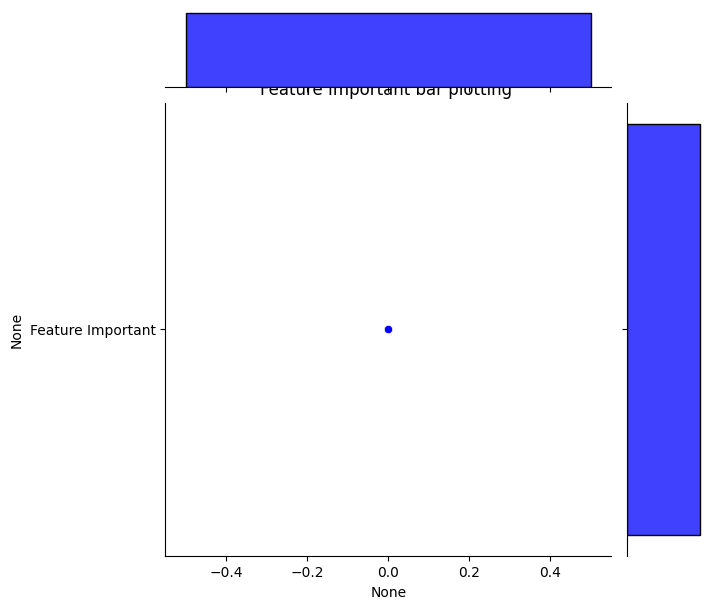

In [137]:
plt.figure(figsize=(15,2),dpi=200)
sns.jointplot('Feature Important',color='blue')
plt.title("Feature Important bar plotting ")
plt.show()

In [138]:
final_model=GradientBoostingRegressor(n_estimators=200,max_depth=3)

In [139]:
final_model.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=200)

In [140]:
# Model Loading and Final testing 

In [141]:
from joblib import dump,load
dump(final_model,'final_prize_model.joblib')

['final_prize_model.joblib']

In [142]:
load_model=load('final_prize_model.joblib')